<a href="https://colab.research.google.com/github/JSJeong-me/OpenCV_Practitioner_Guide_2/blob/main/cv_cap_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### OpenCV - Excercise #1

### By Joo Soo Jeong / Ph.D

### https://github.com/JSJeong-me/

### email: heinem@naver.com

###  Copyrights 2021

### Counts number of caps in a box.

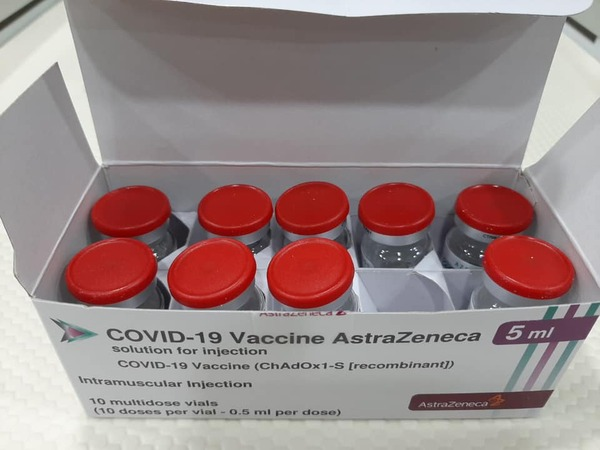

### Get RGB codes values of red caps using Google vision API. 

#### red (161, 32, 30)
#### (111, 30, 32)
#### (174, 29, 18)
#### (150, 39, 47)
#### low [111, 29, 18]
#### high [200, 50, 50]

In [ ]:
#!pip install imutils

In [ ]:
import cv2
import numpy as np
import sys

src = cv2.imread('./antivirus.jpg')

if src is None:
    print('image load failed')
    sys.exit()


rgb_src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

# low [111, 29, 18]
# high [200, 50, 50]
low = np.array([111, 0, 0])
high = np.array([204, 55, 55])
mask = cv2.inRange(rgb_src, low, high)
#result = cv2.bitwise_and(src, src, mask=mask)

blur = cv2.medianBlur(mask,15)

# Distance transfrom
dist_transform = cv2.distanceTransform(blur,cv2.DIST_L2,3)
ret, isolate_image =  cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)

last_image = np.uint8(isolate_image)

# the counting of objects and recording the positions of the objects
cnts, _ = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print('Contour : {0}'.format(len(cnts)))

for (i, c) in enumerate(cnts):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.drawContours(src, [c], -1, (0, 255, 0), 5)
    cv2.putText(src, "{}".format(i + 1), (int(x)-55, int(y)+50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)

cv2.imshow('Anti-virus', src)
cv2.imshow('Distance Transform Iamge', dist_transform)
cv2.imshow('Isolated Iamge', isolate_image)


cv2.waitKey(0)
cv2.destroyAllWindows()